<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data['TotalSpent'] = data['TotalSpent'].replace([' '], '0')
data['TotalSpent'] = data['TotalSpent'].astype(float)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

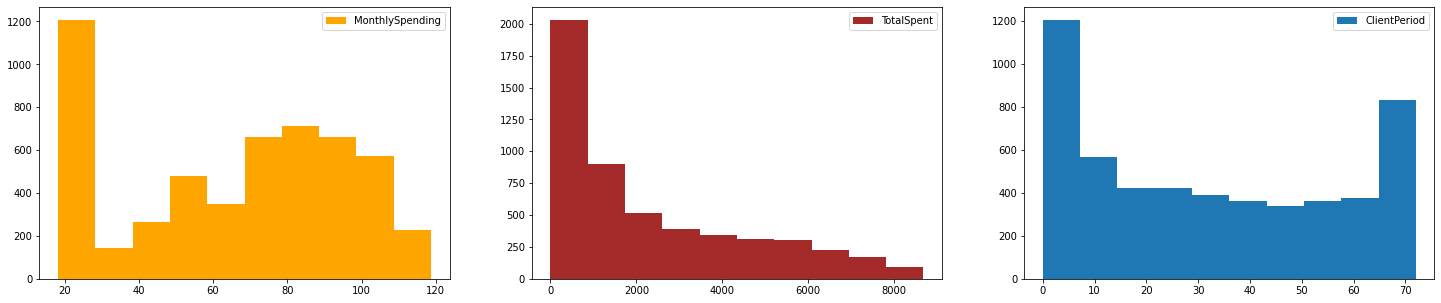

In [ ]:
plt.figure(figsize= (25, 5))
plt.subplot(1, 3, 1)
plt.hist(data['MonthlySpending'], label = 'MonthlySpending', color = 'orange')
plt.legend()
plt.subplot(1, 3, 2)
plt.hist(data['TotalSpent'], label = 'TotalSpent', color = 'brown')
plt.legend()
plt.subplot(1, 3, 3)
plt.hist(data['ClientPeriod'], label = 'ClientPeriod')
plt.legend()
plt.show()

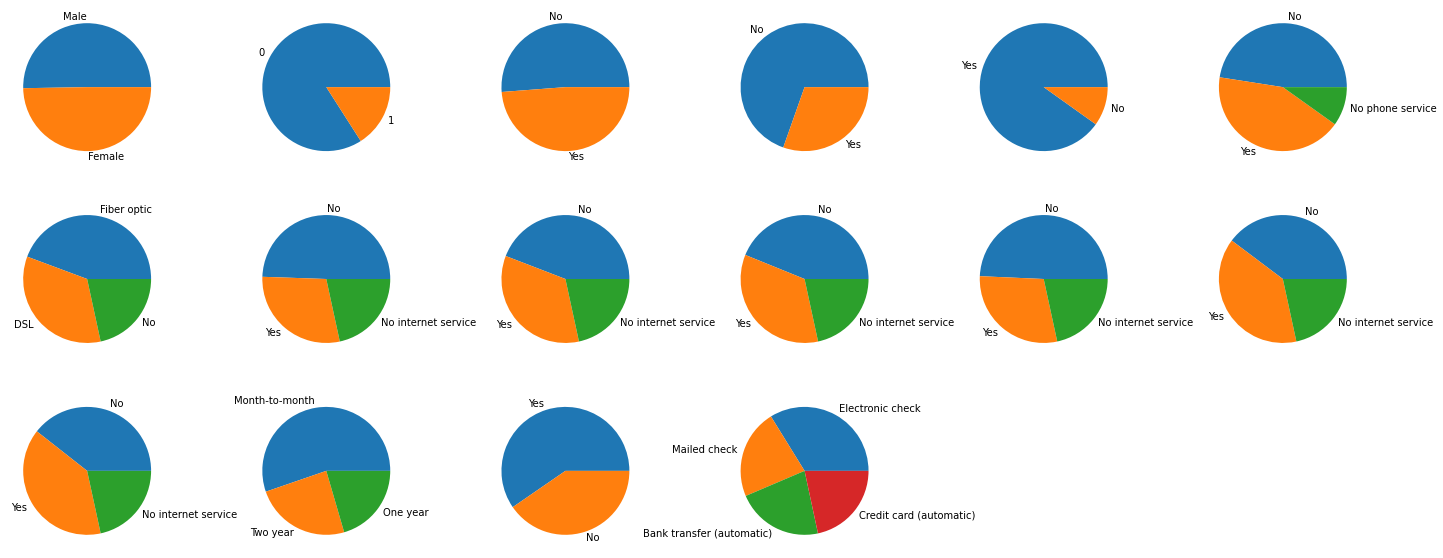

In [ ]:
i = 1
plt.figure(figsize=(25, 10))
for col in cat_cols:
  ser = data[col].value_counts()
  plt.subplot(3, 6, i)
  plt.pie(ser, labels = ser.keys())
  i+=1
plt.show()

count    5282.000000
mean        0.262022
std         0.439776
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

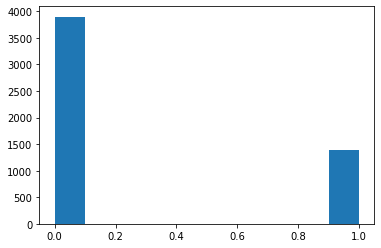

In [ ]:
plt.hist(data[target_col])
data[target_col].describe()

Классы не являются сбалансированными

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
stdscaler = StandardScaler()
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummy_features], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], train_size=0.8)
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.fit(X_test)

params = {'C' : [100, 10, 1, 0.1, 0.01, 0.001]}
#cls = make_pipeline(LabelEncoder(), OneHotEncoder(), StandardScaler(), LogisticRegression())
#CV = GridSearchCV(estimator = cls, param_grid = params, cv = 5, scoring = 'roc_auc', n_jobs =-1)
#CV.fit(data[feature_cols], data[target_col])
#CV.best_estimator_
logreg = LogisticRegression()
CV = GridSearchCV(estimator = logreg, param_grid = params, cv = 5, scoring = 'roc_auc', n_jobs =-1)
CV.fit(X, data[target_col])
CV.best_estimator_
# LRCV = LogisticRegressionCV(Cs = [100, 10, 1, 0.1, 0.01, 0.001], cv = 5, scoring = 'roc_auc', n_jobs =-1, refit = True)
# LRCV.fit(X, data[target_col])
# YOUR CODE

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

C = 10 - best param

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
import catboost
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], train_size = 0.8)
cb_model = catboost.CatBoostClassifier(cat_features=cat_cols, n_estimators = 2000)
cb_model.fit(X_train, y_train)
pred = cb_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, pred)
print(test_auc)


Learning rate set to 0.010095
0:	learn: 0.6861638	total: 22.1ms	remaining: 44.2s
1:	learn: 0.6801383	total: 58.7ms	remaining: 58.6s
2:	learn: 0.6740238	total: 80.3ms	remaining: 53.5s
3:	learn: 0.6678148	total: 113ms	remaining: 56.5s
4:	learn: 0.6630524	total: 119ms	remaining: 47.4s
5:	learn: 0.6573188	total: 131ms	remaining: 43.6s
6:	learn: 0.6528057	total: 142ms	remaining: 40.3s
7:	learn: 0.6473664	total: 159ms	remaining: 39.5s
8:	learn: 0.6418886	total: 173ms	remaining: 38.2s
9:	learn: 0.6364585	total: 187ms	remaining: 37.1s
10:	learn: 0.6310708	total: 212ms	remaining: 38.4s
11:	learn: 0.6261677	total: 231ms	remaining: 38.2s
12:	learn: 0.6210515	total: 244ms	remaining: 37.3s
13:	learn: 0.6156800	total: 257ms	remaining: 36.5s
14:	learn: 0.6111957	total: 268ms	remaining: 35.4s
15:	learn: 0.6064288	total: 282ms	remaining: 34.9s
16:	learn: 0.6018997	total: 296ms	remaining: 34.5s
17:	learn: 0.5973994	total: 310ms	remaining: 34.1s
18:	learn: 0.5934989	total: 339ms	remaining: 35.3s
19:	lear

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

roc auc score = 0.874, n_estimators = 1000, lr = 0.019

# Предсказания

In [ ]:
best_model = cb_model # какая-то предыдущая модель

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', index_col = 'Id')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.